## Qualititative values
### Bar charts - absolute vs relative frequency 
- seaborn countplot bar chart
- matplotlib pie chart

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [56]:
df = pd.read_csv('pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [57]:
df['generation_id'].unique(), df['type_1'].unique()

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
        'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
        'dragon', 'dark', 'steel', 'flying'], dtype=object))

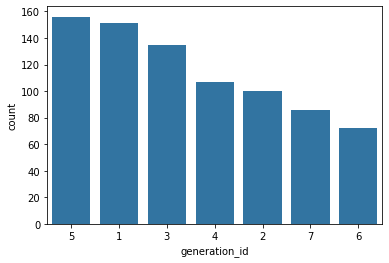

In [4]:
#bar chart - categorical variable generation_id
gen_order = df.generation_id.value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data=df, x='generation_id', color=base_color, order=gen_order);

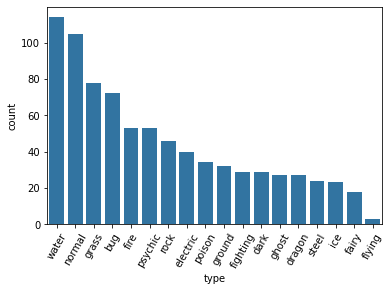

In [5]:
type_order = df.type_1.value_counts().index
sb.countplot(data=df, x='type_1', color=base_color, order=type_order)
plt.xticks(rotation=60)
plt.xlabel('type');

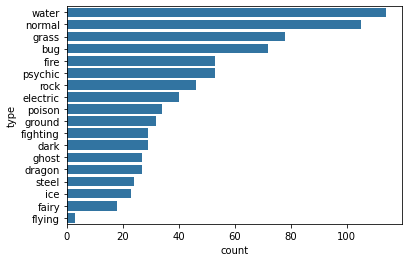

In [6]:
type_order = df.type_1.value_counts().index
sb.countplot(data=df, y='type_1', color=base_color, order=type_order)
plt.ylabel('type');

In [7]:
df.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [8]:
#create a dataframe with different pokemon types in one column
df_type = pd.melt(df, id_vars=['id','species'], value_vars=['type_1', 'type_2'], var_name="type_level", value_name='type').dropna()
df_type

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


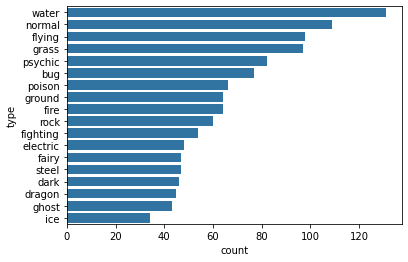

In [9]:
#plot a horizontal bar charts using the absolute value of type count
type_count = df_type.type.value_counts()
type_order = type_count.index
sb.countplot(data=df_type, y='type', color=base_color, order=type_order);

In [10]:
#plot a horizontal bar charts using the relative value of type count - proportion
#we need to replace the tick name with a list of evenly spaced proportioned values
#step 1: Find the maximum proportion of bar
total = df_type.type.value_counts().sum()
max_type_total = df_type.type.value_counts()[0]
max_prop = max_type_total/total
max_prop

0.10808580858085809

In [11]:
#step 2: Create an array of evenly spaced proportioned values
tick_prop = np.arange(0, max_prop, 0.02)
tick_prop

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [13]:
#step 3: Create a list of String values that can be used as tick labels
tick_names=[]
for i in tick_prop:
    tick_name = '{:0.2f}'.format(i)
    tick_names.append(tick_name)
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

Text(0.5, 0, 'proportion')

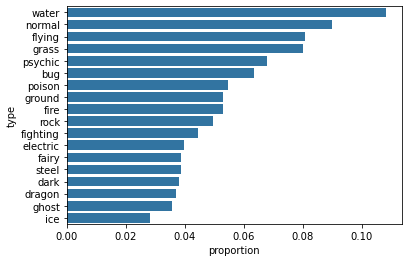

In [14]:
#Plot the bar chart, with relative x-tick labels
sb.countplot(data=df_type, y='type', color=base_color, order=type_order)
plt.xticks(tick_prop*total, tick_names)
plt.xlabel('proportion')

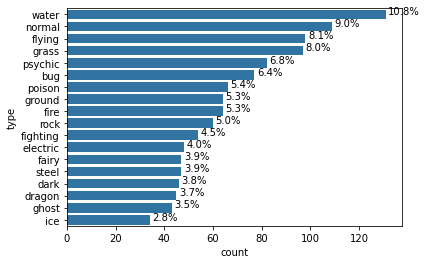

In [62]:
#Print the text (proportion) on the bars of a horizontal plot using plt.text() function
sb.countplot(data=df_type, y='type', color=base_color, order=type_order)
plt.xlabel('count')

for i in np.arange(type_count.shape[0]):
    count = type_count[i]
    text = '{:0.1f}%'.format(100*type_count[i]/total)
    plt.text(count+1, i, s=text)

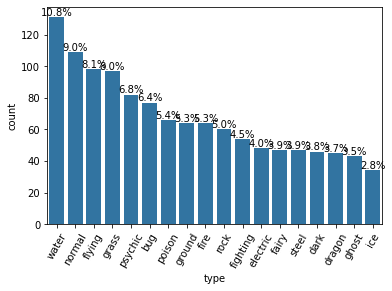

In [16]:
#Print the text (proportion) below the bars of a Vertical plot method 1
sb.countplot(data=df_type, x='type', color=base_color, order=type_order)
locs, labels = plt.xticks(rotation=60)
#from matplotlib import rcParams
#rcParams['figure.figsize'] = 12,4

for loc, label in zip(locs, labels):
    count = type_count[label.get_text()]
    text = '{:0.1f}%'.format(100*type_count[loc]/total)
    plt.text(loc, count+1, s=text, ha='center')

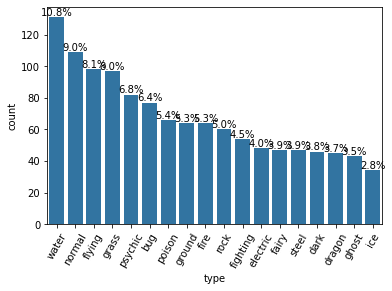

In [17]:
#Print the text (proportion) below the bars of a Vertical plot method 2
sb.countplot(data=df_type, x='type', color=base_color, order=type_order)
plt.xticks(rotation=60)
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,4

for i in np.arange(type_count.shape[0]):
    count = type_count[i]
    text = '{:0.1f}%'.format(100*type_count[i]/total)
    plt.text(i, count+1, s=text, ha='center')

In [18]:
sorted_counts = df['generation_id'].value_counts()

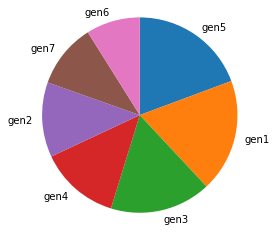

In [19]:
#plot a pie chart with the sorted generations in a clockwise fasion
#the axis function call and square argument makes it so that the scaling of the plot is equal on both the x and y axes
plt.pie(sorted_counts, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle=90, counterclock=False)
plt.axis('square');

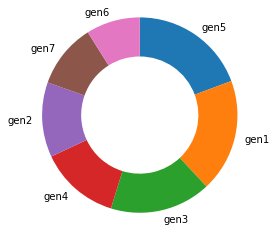

In [20]:
#plot a donut pie chart with the sorted generations in a clockwise fasion
plt.pie(sorted_counts, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle=90, counterclock=False, wedgeprops = {'width' : 0.4})
plt.axis('square');

## Quantitative value
### Histograms
- use matplotlib plt.hist() to plot histogram, including plt.subplot() to plot multiple histogram
- use seaborn sb.distplot() to plot histogram

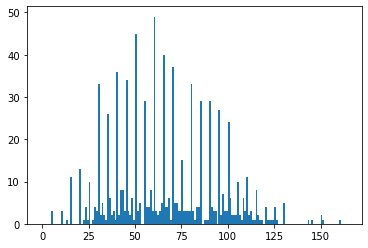

In [63]:
bins=np.arange(0, df.speed.max()+5, 1)
plt.hist(data=df, x='speed', bins=bins);

C:\Users\zhteg\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


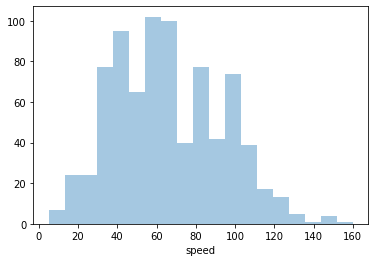

In [64]:
sb.distplot(df.speed, kde=False);

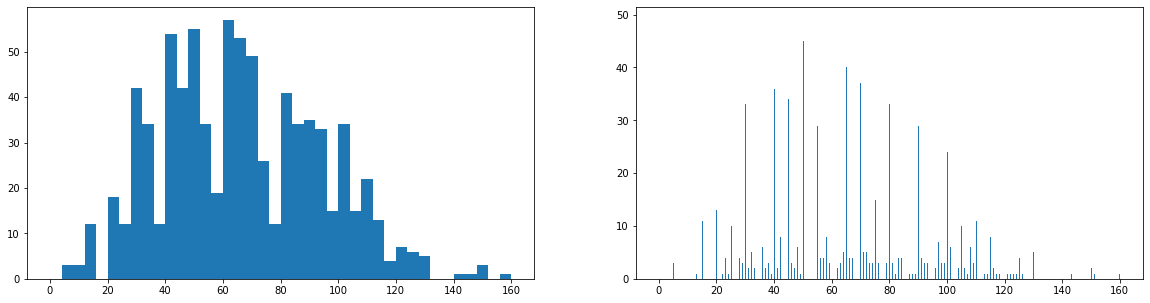

In [65]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data = df, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, df['speed'].max()+1/4, 1/4)
plt.hist(data = df, x = 'speed', bins = bins);


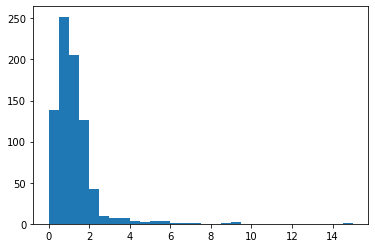

In [66]:
#Plot the histogram for the height column
bins = np.arange(0, df.height.max()+1, 0.5)
plt.hist(data=df,x='height', bins=bins);

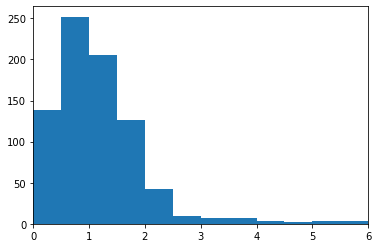

In [67]:
#Plot the histogram for the height column with a changed axis limit
bins = np.arange(0, df.height.max()+1, 0.5)
plt.hist(data=df,x='height', bins=bins);
plt.xlim((0,6));

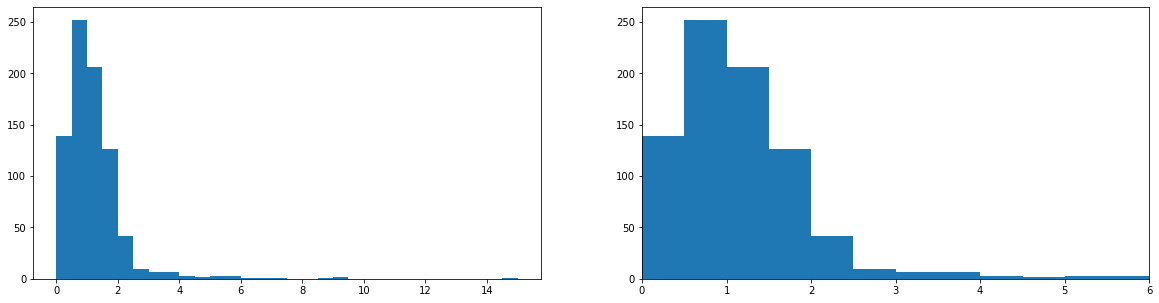

In [69]:
# have two plots side-by-side
plt.figure(figsize=[20,5])
bins = np.arange(0, df.height.max()+1, 0.5)
#on the left
plt.subplot(1,2,1)
plt.hist(data=df, x='height', bins=bins);

#on the right
plt.subplot(1,2,2)
plt.hist(data=df, x='height', bins=bins)
plt.xlim((0,6));

#### Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. 

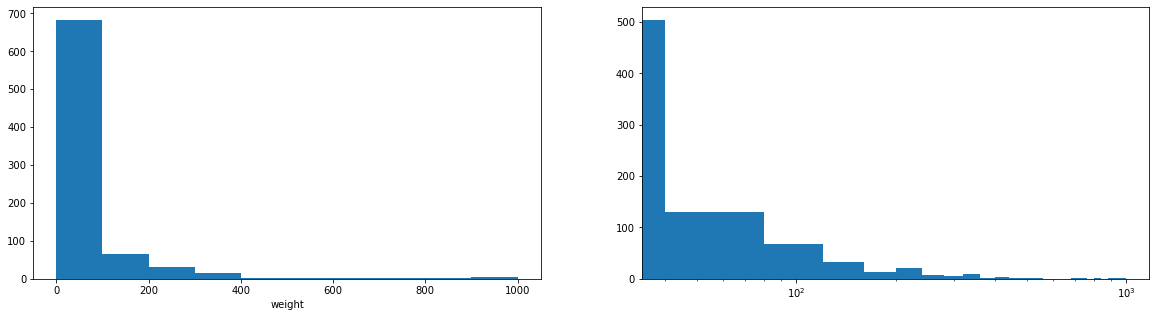

In [83]:
#Plot the histogram for the weight column
plt.figure(figsize=[20,5])
#histogram on the left
plt.subplot(1,2,1)
plt.hist(data=df, x='weight')
plt.xlabel('weight');
#histogram on the right using log-type scale. 
plt.subplot(1,2,2)
bins = np.arange(0, df.weight.max()+40, 40)
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')

In [70]:
df.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [50]:
np.log10(df.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

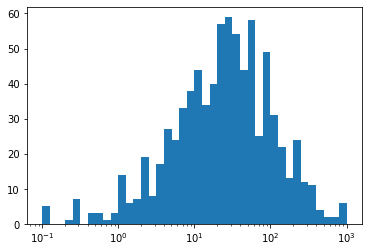

In [84]:
bins = 10**np.arange(-1, 3+0.1, 0.1)
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')

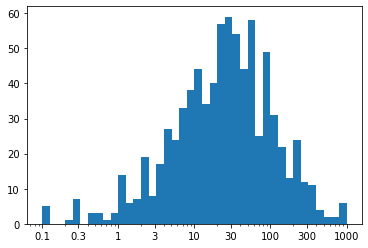

In [81]:
# Scale the x-axis to log-type, change the axis limits, and increase the x-ticks
bins = 10**np.arange(-1, 3+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df, x='weight', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels);

### Counting missing values

In [76]:
sales_data = pd.read_csv('sales-data.csv')

In [77]:
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [80]:
#drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price', 'IsHoliday'], axis=1).isna().sum()
na_counts.index

Index(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
sb.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation=60)

for i in np.arange(na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+3, count, ha='center');